In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Structure des données:**

In [7]:
print(data.shape)

(4424, 35)


**Seulement notre target est une entrée de type non-numérique:**

In [8]:
print(data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz

In [18]:
data = data[data['Target'] != "Enrolled"]
print(data.shape)

dataY = data.iloc[:,-1:]
dataX = data.drop("Target", axis=1)

arrayX = pd.DataFrame.to_numpy(dataX)
arrayY = pd.DataFrame.to_numpy(dataY)

print(arrayX.shape)
print(arrayY.shape)

(3630, 35)
(3630, 34)
(3630, 1)
['Dropout' 'Graduate']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(arrayX, arrayY, test_size=0.2)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

[1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 1 0 1 1 

c:\Users\Guillaume Gagnon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Guillaume Gagnon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
xgbClassifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgbClassifier.fit(X_train, y_train)
xgbClassifier.score(X_train, y_train)

1.0

In [32]:
xgbClassifier.score(X_test, y_test)

0.8953168044077136

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

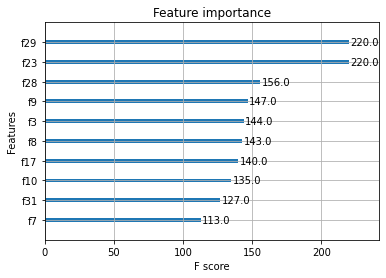

In [31]:
xgbClassifier.score(X_test, y_test)
xgb.plot_importance(xgbClassifier, max_num_features=10)